In [459]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [460]:
df = pd.read_csv('Sample - Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [461]:
df.shape

(9994, 21)

In [462]:
(df.isna().sum() / df.shape[0]).sort_values()

Row ID           0.0
Quantity         0.0
Sales            0.0
Product Name     0.0
Sub-Category     0.0
Category         0.0
Product ID       0.0
Region           0.0
Postal Code      0.0
Discount         0.0
State            0.0
Country          0.0
Segment          0.0
Customer Name    0.0
Customer ID      0.0
Ship Mode        0.0
Ship Date        0.0
Order Date       0.0
Order ID         0.0
City             0.0
Profit           0.0
dtype: float64

# Les ventes

 # Quel est le mois durant lequel il y'a les meilleurs ventes ?

In [463]:
def month(x):
    return x.split('/')[0]
month('11/8/2016')

'11'

In [464]:
df.dtypes.value_counts()

object     15
int64       3
float64     3
dtype: int64

In [465]:
df['Month'] = df['Order Date'].apply(month)
df['Month'].unique()

array(['11', '6', '10', '4', '12', '5', '8', '7', '9', '1', '3', '2'],
      dtype=object)

In [466]:
df['Month'] = df['Month'].astype('int')

In [467]:
df.dtypes.value_counts()

object     15
int64       4
float64     3
dtype: int64

Text(0.5, 0, 'Month number')

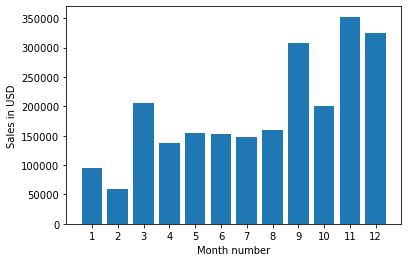

In [468]:
months = range(1,13)
plt.bar(months,df.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')

On remarque que le mois où il y'a le plus de ventes est Novembre

# Dans quelle région le magasin enregistre un maximum de commande ?

Text(0.5, 0, 'State name')

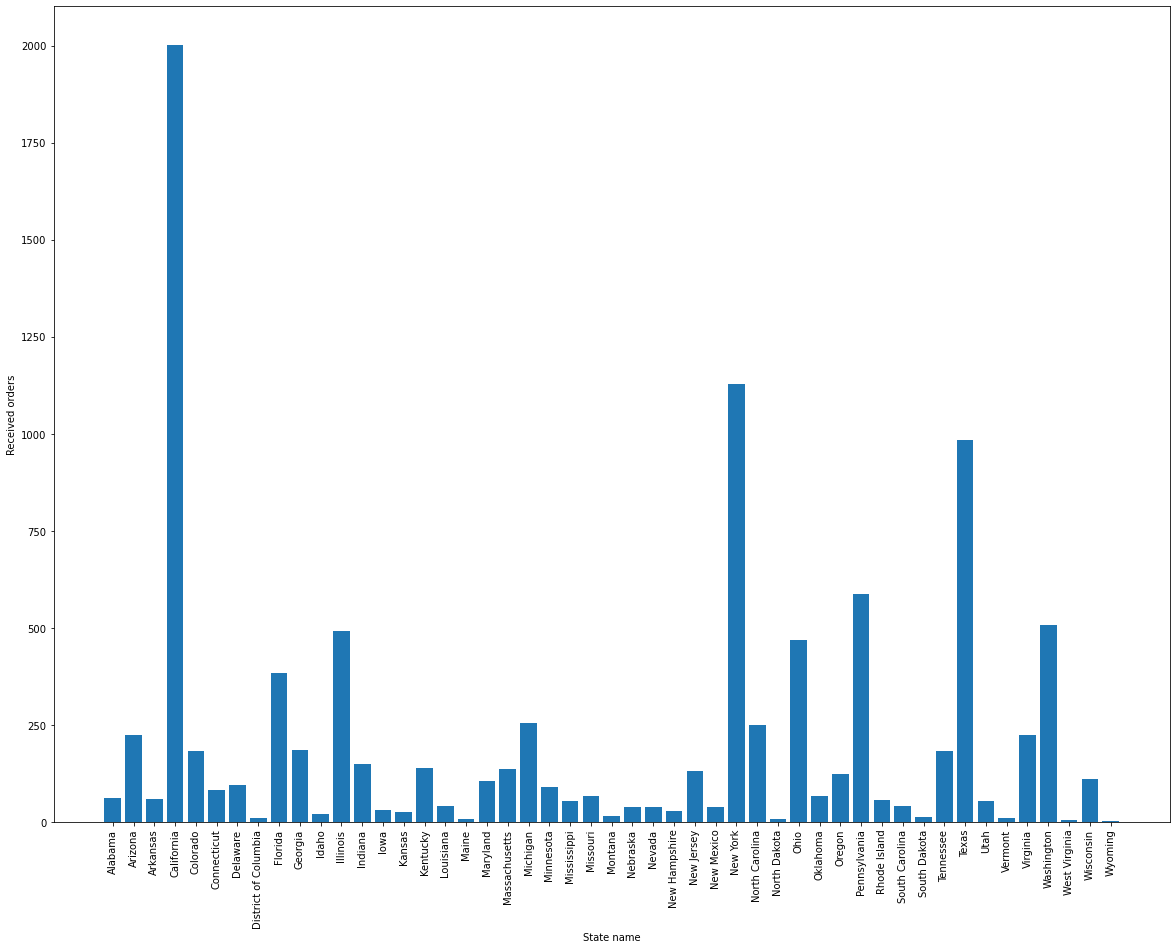

In [469]:
plt.figure(figsize=(20,15))
plt.bar(df.groupby('State')['State'].count().index,df.groupby('State')['State'].count().values)
plt.xticks(rotation='vertical')
plt.ylabel('Received orders')
plt.xlabel('State name')

On remarque que la californie est la région dans laquelle il y'a de loin le plus de ventes

# Dans quelle région on enregistre la moyenne des ventes est la plus élevé ?

Text(0, 0.5, 'Sales')

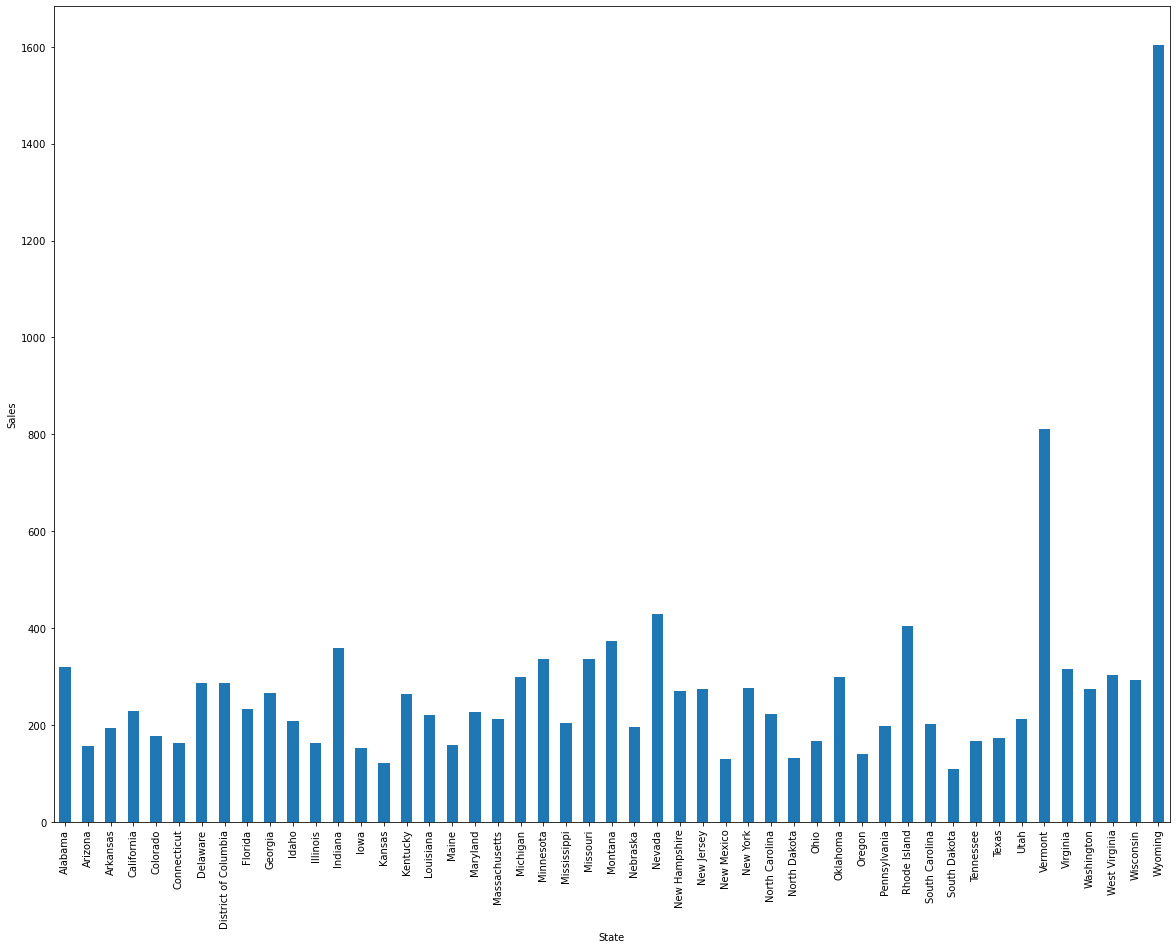

In [470]:
plt.figure(figsize=(20,15))
df.groupby('State')['Sales'].mean().plot(kind='bar')
plt.ylabel('Sales')

La région dans laquelle on enregistre de loin les meilleurs ventes est Wyoming

# Quel catégorie de produit est la plus vendu ?

In [471]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category'>

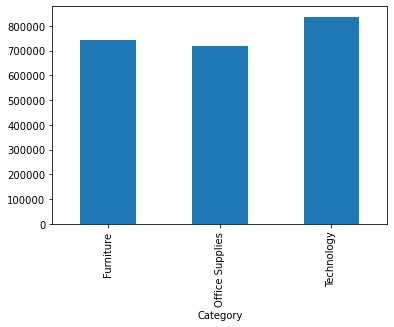

In [472]:
df.groupby('Category')['Sales'].sum().plot(kind='bar')

La catégorie des produits les plus vendus sont ceux liés à la technologie

# A quel segment de clientéle on enregistre le maximum de ventes ?

<AxesSubplot:xlabel='Segment'>

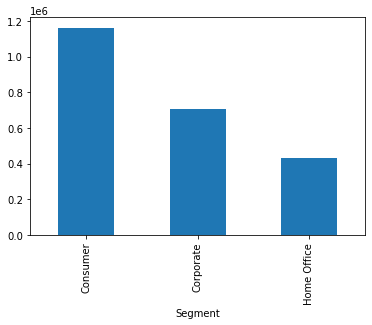

In [473]:
df.groupby('Segment')['Sales'].sum().plot(kind='bar')

La catégorie à qui le magasin vend le plus est Consumer

# Quel est la sous catégorie de produit le plus vendu ?

<AxesSubplot:xlabel='Sub-Category'>

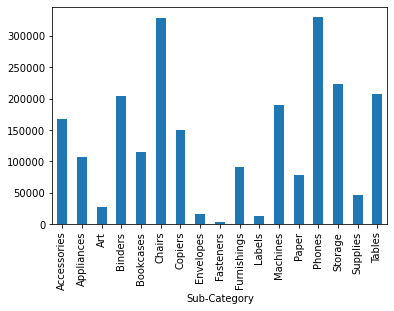

In [474]:
df.groupby('Sub-Category')['Sales'].sum().plot(kind='bar')

Les téléphones sont la sous catégorie la plus vendu juste devant les produits de cheveux

In [475]:
category = df.groupby('Sub-Category')['Quantity'].sum().index
quantity = df.groupby('Sub-Category')['Quantity'].sum()
discount = df.groupby('Sub-Category')['Discount'].mean()

[Text(0, 0, 'Accessories'),
 Text(1, 0, 'Appliances'),
 Text(2, 0, 'Art'),
 Text(3, 0, 'Binders'),
 Text(4, 0, 'Bookcases'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Copiers'),
 Text(7, 0, 'Envelopes'),
 Text(8, 0, 'Fasteners'),
 Text(9, 0, 'Furnishings'),
 Text(10, 0, 'Labels'),
 Text(11, 0, 'Machines'),
 Text(12, 0, 'Paper'),
 Text(13, 0, 'Phones'),
 Text(14, 0, 'Storage'),
 Text(15, 0, 'Supplies'),
 Text(16, 0, 'Tables')]

<Figure size 2880x1728 with 0 Axes>

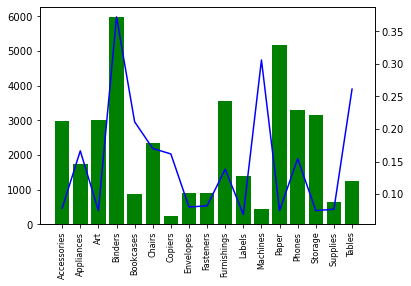

In [476]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(category,quantity,color='g')
ax2.plot(category,discount,'b-')
ax1.set_xticklabels(category,rotation='vertical',size=8)

On remarque ici que plus il y'a de remise sur un produit , plus ce produit est vendu

# Modélisation

In [477]:
df2 = df.copy()
df2

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2


In [478]:
df2.drop(['Product Name','Product ID','Postal Code','Customer Name','Customer ID','Row ID','Order ID','Order Date','Ship Date'],axis=1,inplace=True)

In [479]:
df2.drop(['Country'],axis=1,inplace=True)

In [480]:
df2

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Month
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,11
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,11
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,6
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,10
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,10
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,1
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,2
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932,2
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,2


# Encodage de données

In [481]:
var_cat = []

for col in df2.select_dtypes('object'):
    var_cat.append(col)

from sklearn.preprocessing import LabelEncoder

for col in var_cat:
    encoder = LabelEncoder()
    df2[col] = encoder.fit_transform(df[col])

In [483]:
X = df2.drop(['Sales','Month','Ship Mode','Segment','State','City'],axis=1)
y = df2['Sales']

In [484]:
X

,Region,Category,Sub-Category,Quantity,Discount,Profit
0,2,0,4,2,0.00,41.9136
1,2,0,5,3,0.00,219.5820
2,3,1,10,2,0.00,6.8714
3,2,0,16,5,0.45,-383.0310
4,2,1,14,2,0.20,2.5164
...,...,...,...,...,...,...
9989,2,0,9,3,0.20,4.1028
9990,3,0,9,2,0.00,15.6332
9991,3,2,13,2,0.20,19.3932
9992,3,1,12,4,0.00,13.3200


In [485]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression 
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge

In [486]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [487]:


np.random.seed(17)
model = make_pipeline(StandardScaler(),RandomForestRegressor())
model.fit(X_train , y_train)
print(model.score(X_test,y_test))

0.8642519254964938


In [488]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=3).mean()

0.700419677652362

In [489]:
y_pred = model.predict(X_test)

In [490]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

In [491]:
mean_absolute_error(y_test,y_pred)/np.mean(y_test)

0.2680794725416277

In [492]:
mean_absolute_percentage_error(y_test,y_pred)

0.32211828474735693